# Main Concept

- Goal: find the hyperplane to maximize the distance to both classes
- linear model $wx-b=0$ (decision boundary)
    - we want to satisfy $wx_i-b \geq 1, \text{ if } y_1 = 1$, and $wx_i - b \leq -1, \text{ if } y_i = -1$
    - equivalent to $y_i(wx_i-b) \geq 1$
- cost function
    - hinge loss: $$l = max(0, 1-y_i(wx_i-b))$$
        - l = 0 if $y \cdot f(x) \geq 1$ (prediction and class label have the same sign)
        - l = 1 - yf(x) otherwise
    - regularization: maximizing margin between two classes $max \frac{2}{||w||}$
    - combined loss: $$J = \lambda ||w||^2 + \frac{1}{n}\sum^n_{i=1} max(0, 1-y_i(wx_i-b))$$
        - if $y_i f(s) \geq 1$ (same sign, correct prediction): $J_i = \lambda ||w||^2$
            - $dw = 2\lambda w_k$, $db = 0$
        - else: $J_i = \lambda ||w||^2 + 1 - y_i(wx_i - b)$
            - $dw = 2\lambda w_k - y_ix_i$, $db = y_i$

In [3]:
import numpy as np

class SVM:

    def __init__(self, lr = 0.001, lambda_param = 0.01, n_iters = 1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        # ensure y is in {-1, 1}
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i  in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    self.w -= self.lr * dw
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    self.w -= self.lr * dw
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

# Test

Weights: [0.50573101 0.25466696]
Bias: -0.6000000000000003


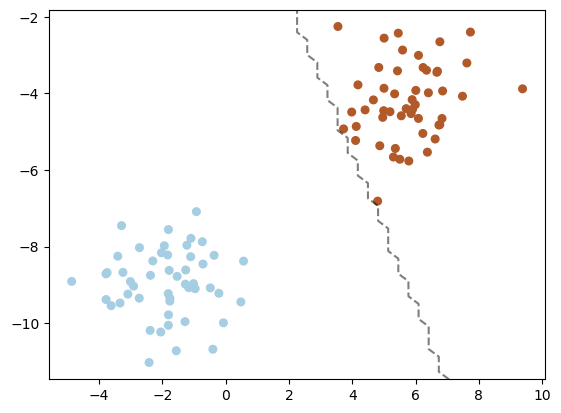

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

svm = SVM(lr=0.01, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)
print("Weights:", svm.w)
print("Bias:", svm.b)

def visualize_svm(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.predict(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')
    
    plt.show()
visualize_svm(X, y, svm)